In [1]:
import os
import numpy as np
import csv
def count_images(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp')
    return sum(1 for file in os.listdir(folder_path) if file.lower().endswith(image_extensions))

# Set your folder path
folder_path = '/Users/bakuljangley/Documents/ResearchAssignment/VPRMethods/final_mast3r_test_dataset/'
image_count = count_images(folder_path)
print(f'Total images: {image_count}')
csv_path = 'metadata.csv'

Total images: 45


In [ ]:
from scenes import scene_locations1, scene_locations2, scene_locations3
path = "/Users/bakuljangley/Documents/ResearchAssignment/VPRMethods/final_mast3r_test_dataset"


#sets have images ordered
set1 = np.arange(0,9) #actually corresponds to locations
set2 = np.arange(9,18) #90 positive
set3 = np.arange(18,27) #90 negative
set4 = np.arange(27,36) #locations
set5 = np.arange(36,45) #90 positive

scene_rotations = [0,90,-90,0,90] #rotation per scene

def rotatePointsAboutY(points, angle_degrees): #angle is positive in the counterclockwise direction
    angle_radians = np.radians(angle_degrees)
    rotation_matrix = np.array([
        [np.cos(angle_radians), 0, -np.sin(angle_radians)],
        [0, 1, 0],
        [np.sin(angle_radians), 0, np.cos(angle_radians)]
    ])
    # Convert 2D points to 3D by adding y=0
    points_3d = np.array([[x, 0, z] for x, z in points])
    
    # Apply rotation
    rotated_points = np.dot(points_3d, rotation_matrix.T)
    
    # Return as 2D points (x and z coordinates)
    return rotated_points[:, [0, 2]]


def getSceneLocations(scene_id, scene_rotations=[0,90,-90,0,90]):
    #these locations will be according to the image_id in 
    locations = [[0, 0], [0, -200], [0, 200], [200, 0], [-200, 0], [200, -200], [-200, -200], [200, 200], [-200, 200]]
    if scene_id in [1,2,3,4,5]:
        return rotatePointsAboutY(locations, scene_rotations[scene_id-1])
    else:
        print("Invalid Scene ID")
        return None


# Get the current working directory
root = os.getcwd()
print("Current working directory:", root)

def getImageFromIndex(index, image_folder=root):
    filename = image_folder + '/metadata.csv'
    with open(filename, 'r', newline='') as csvfile:
        csvreader = csv.DictReader(csvfile)
        
        for row in csvreader:
            if row['id'] == str(index):
                image_path = os.path.join(image_folder, row['image_name'])
                return row['id'], image_path
        
        return None  # ID not found

print(getImageFromIndex(1))






Current working directory: /Users/bakuljangley/Documents/ResearchAssignment/VPRMethods/final_mast3r_test_dataset
('1', '/Users/bakuljangley/Documents/ResearchAssignment/VPRMethods/final_mast3r_test_dataset/IMG_1948.JPG')


In [ ]:
#ideally i want to read the scene as an anchor query pairs 

from itertools import combinations
# Create pairs of all images
image_pairs = list(combinations(set1, 2))
print(image_pairs)

queries = []
anchors = []






[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)]


[[0, 0], [0, -200], [0, 200], [200, 0], [-200, 0], [200, -200], [-200, -200], [200, 200], [-200, 200]]


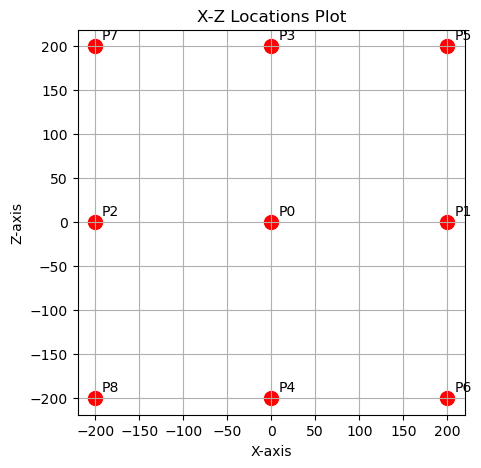

In [7]:
print(scene_locations1)

import matplotlib.pyplot as plt
import numpy as np

def plotPointsXZ(locations):
    # Separate x and z coordinates
    x = [loc[0] for loc in locations]
    z = [loc[1] for loc in locations]

    # Create the plot
    plt.figure(figsize=(5, 5))
    plt.scatter(x, z, color='red', s=100)  # Plot points

    # Add labels for each point
    for i, loc in enumerate(locations):
        plt.annotate(f'P{i}', (loc[0], loc[1]), xytext=(5, 5), 
                    textcoords='offset points')

    # Set axis labels
    plt.xlabel('X-axis')
    plt.ylabel('Z-axis')

    # Set title
    plt.title('X-Z Locations Plot')

    # Add grid
    plt.grid(True)

    # Set equal scaling (so circles look circular)
    plt.axis('equal')

    # Show the plot
    plt.show()


plotPointsXZ(getSceneLocations(2))
